In [9]:
import numpy as np
import matplotlib.pyplot as plt
import librosa as lb
from scipy.fftpack import fft
import sounddevice as sd
from scipy.signal import hann, hamming, freqz

# from audiolazy import lazy_lpc as lpc
import librosa 

In [10]:
# provided functions
def est_predictor_gain(x, a, p):
    '''
    A function to compute gain of the residual signal in LP analysis.
    x:  signal 
    a: LPC coefficients
    p: order of the filter
    '''
    cor = np.correlate(x, x, mode='full')
    
    rr = cor[len(cor)//2: len(cor)//2+p+1]
    g = np.sqrt(np.sum(a*rr))
    return g

   
    
def reject_outliers(data, m=2):
    '''
    Function to reject outliers. All values beyond m standard deviations from mean are excluded
    '''
    return data[abs(data - np.mean(data)) < m * np.std(data)]

### 1. Linear prediction analysis. (1 point) 

In [ ]:
# Read audio
audioIn, fs = lb.load('audio.wav', sr=None)   

# filter order
p = 4  # d) has to be tuned

# number of DFT points
nfft = 1024

inInd =0
wLen = int(0.02*fs) # 20 ms window
win = hamming(wLen) # hamming window for example

cnt = 0
numframes = np.ceil( (len(audioIn)-wLen)/(wLen/2)) # number of franes 
formants  = []                                     # A placeholder for storing formants

# choose a representative frame of the vowel
plot_frame = int(numframes/2)  # middle of the vowel

# The analysis loop
while inInd< len(audioIn)-wLen:
    # audio frame
    frame = audioIn[inInd:inInd+wLen]* win
    
    
    # a) compute LPC and gain using audiolazy library
    
 
    
    # b) Compute the filter tansfer function using scipy.signal.freqz
 
    
    # Compute DFT spectrum
    
    
    inInd = inInd + int(wLen/2) # frame advance
    
    cnt = cnt+1
    
    # c) Select a frame and plot the FFT spectrum and LPC spectrum in the same figure
    if cnt == plot_frame :
        # plot DFT spectrum (remember both in dB scale)
        # plot LPC spectrum
        plt.figure()
        

#### d) Comment of the connection between lpc model order and peaks in the DFT spectrum.

#### Is the best order selection dependent on the vowel or not?

### 2. Formant analysis. (1 point)

#### Add more steps in the previous analysis loop

------ The computed formants are : [ 425.14459322  815.93138007 2180.98230478]


C:\Users\Phan Phuong Uyen\AppData\Local\Temp\ipykernel_27056\120831650.py:12: DeprecationWarning: Importing hamming from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hamming' or the convenience function 'scipy.signal.get_window' instead.
  win = hamming(wLen) # hamming window for example


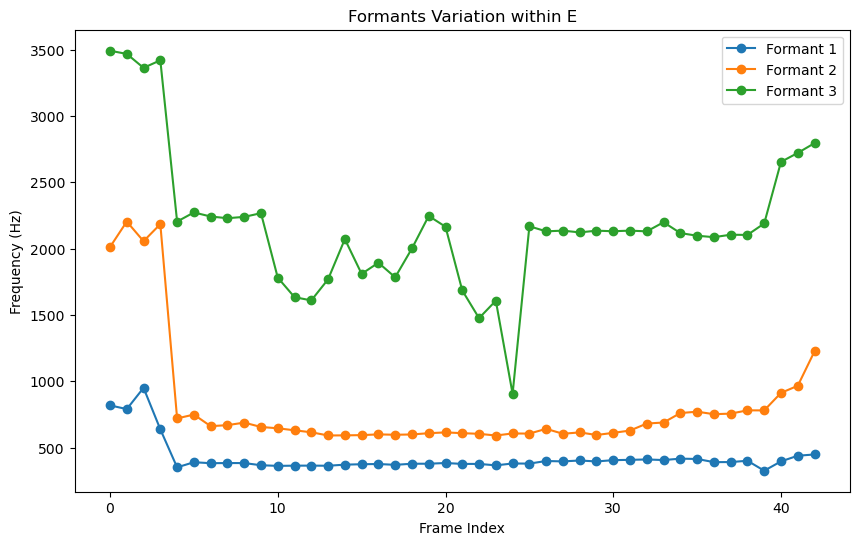

In [20]:
# Read audio
audioIn, fs = lb.load('o.wav', sr=None)   

# filter order
p = 16  # d) has to be tuned

# number of DFT points
nfft = 1024

inInd =0
wLen = int(0.02*fs) # 20 ms window
win = hamming(wLen) # hamming window for example

cnt = 0
numframes = np.ceil( (len(audioIn)-wLen)/(wLen/2)) # number of franes 
formants  = []                                     # A placeholder for storing formants

# choose a representative frame of the vowel
plot_frame = int(numframes/2)  # middle of the vowel

# The analysis loop
while inInd< len(audioIn)-wLen:
    # audio frame
    frame = audioIn[inInd:inInd+wLen]* win
    
    
    # Compute LPC and gain using audiolazy library
    lpc_coeffs = librosa.lpc(frame, order=p)
    gain = est_predictor_gain(frame, lpc_coeffs, p)


    # Compute the filter transfer function using scipy.signal.freqz
    frequencies, h = freqz(gain, lpc_coeffs, worN=nfft, fs=fs)

    # Compute DFT spectrum
    spectrum = np.fft.fft(frame, nfft)

    # a) Compute roots (np.roots)
    roots = np.roots(lpc_coeffs)

    # LPC coefficients are real-valued, the roots occur in complex conjugate pairs.
    # Retain only the roots with +ve sign for the imaginary part
    roots = roots[roots.imag > 0]

    # b.1) compute formants from roots (np.angle)
    angz = np.angle(roots)

    # convert to Hertz from angular frequencies
    angz = angz*(fs/(2*np.pi))

    # sort the formants in increasing order
    angz = np.sort(angz)
    
    # remove zero frequencies
    angz = angz[angz !=0]
    
    # b.2) Save first three formants
    formants.append(angz[:3]) 
    inInd = inInd + int(wLen/2) # frame advance
    cnt = cnt + 1
       

        

formants = np.array(formants)
# b.3) For each separate vowel calculate average formant frequencies
print('------ The computed formants are :', np.mean(formants, 0))
# Plot formants within a vowel
plt.figure(figsize=(10, 6))
plt.plot(formants[:, 0], label='Formant 1', marker='o')
plt.plot(formants[:, 1], label='Formant 2', marker='o')
plt.plot(formants[:, 2], label='Formant 3', marker='o')
plt.title(f'Formants Variation within E')
plt.xlabel('Frame Index')
plt.ylabel('Frequency (Hz)')
plt.legend()
plt.show()
# Refine formant estimations (optional)

#### b.4) Compare the obtained values with the indicative values. 

### Bonus problem: What happens if you apply LPC to the oboe sound? What are the corresponding "formants"?